# Construisons un chatbot
https://www.kdnuggets.com/2019/12/build-intelligent-chatbot.html

# Prérequis et terminologies pour les chatbots

Dans ce notebook Construisons un chatbot en utilisant Python NLTK, nous avons écrit un code python simple et construit un chatbot. 
Les questions et réponses ont été librement codées en dur, ce qui signifie que le chatbot ne peut pas donner de réponses satisfaisantes aux questions qui ne sont pas présentes dans votre code. 
Notre chatbot n'est donc pas considéré comme un bot intelligent.

Le traitement du langage naturel (NLP) est l'un des domaines les plus prometteurs de l'intelligence artificielle qui utilise les langues naturelles pour permettre aux humains d'interagir avec les machines.

Il existe deux approches principales en NLP :

    les méthodes basées sur des règles (répond à des questions basées sur des règles simples sur lesquelles ils sont       formés.),
    les méthodes statistiques, c'est-à-dire les méthodes liées à l'apprentissage machine(pour converser avec les           utilisateurs.).

Il existe plusieurs bibliothèques Python pour la NLP, telles que Natural Language Toolkit (NLTK), spaCy, TextBlob, etc.

Un chatbot est un logiciel informatique capable d'interagir avec des humains en utilisant un langage naturel. 
Ils s'appuient généralement sur l'apprentissage machine, en particulier sur le NLP. 
Exemples: Siri d'Apple, Alexa d'Amazon, Google Assistant et Cortana de Microsoft sont les logiciels les plus connus capables de traiter les langues naturelles.

Cet article nous montre comment créer un simple chatbot en Python. Notre bot sera utilisé pour répondre à quelques questions. 
Ici, nous allons seulement gratter la surface de ce qui est possible dans la construction de chatbots personnalisés et le PNL en général.



Il y a quelques notions à connaitre avant d'aller plus loin. Traitement du langage naturel (NLP) utilisant la similarité NLTK, TF-IDF et cosinus.

Boîte à outils en langage naturel (NLTK)
                               
NLTK est une plate-forme de premier plan pour la création de programmes Python pour travailler avec des données en langage humain. Il fournit des interfaces faciles à utiliser vers plus de 50 corpus et ressources lexicales telles que WordNet, ainsi qu'une suite de bibliothèques de traitement de texte pour la classification, la tokenisation, la recherche de racines, le marquage, l'analyse et le raisonnement sémantique, des wrappers pour les bibliothèques de PNL de niveau industriel, et un forum de discussion actif.

                                                                     
TF-IDF : Nous allons calculer les vecteurs Term Frequency-Inverse Document Frequency (TF-IDF) pour chaque document. Cela vous donnera une matrice où chaque colonne représente un mot dans le vocabulaire général (tous les mots qui apparaissent dans au moins un document).
                                                                                                                                         
TF-IDF est la méthode statistique d'évaluation de la signification d'un mot dans un document donné.
                                  
TF - La fréquence des termes (tf) fait référence au nombre de fois qu'un terme donné apparaît dans un document.
                                  
IDF - La fréquence inverse du document (idf) mesure le poids du mot dans le document, c'est-à-dire si le mot est commun ou rare dans tout le document.
             

L'intuition TF-IDF suit que les termes qui apparaissent fréquemment dans un document sont moins importants que les termes qui apparaissent rarement.                                                                                                                                    
Heureusement, scikit-learn vous offre une classe TfIdfVectorizer intégrée qui produit assez facilement la matrice TF-IDF.
                                                                                                      
Similitude cosinus Maintenant que nous avons cette matrice, nous pouvons facilement calculer un score de similarité. Il existe plusieurs options pour ce faire; tels que les scores de similarité euclidienne, de Pearson et cosinus. Encore une fois, il n'y a pas de bonne réponse pour savoir quel score est le meilleur.                                                                                                                                      
Nous utiliserons la similarité cosinus pour calculer une quantité numérique qui dénote la similitude entre les deux mots. Vous utilisez le score de similarité cosinus car il est indépendant de la magnitude et est relativement facile et rapide à calculer (en particulier lorsqu'il est utilisé en conjonction avec les scores TF-IDF). 
Mathématiquement, il est défini comme suit:

                                  


# Prétraitement de texte avec NLTK

In [2]:
from IPython.display import Image

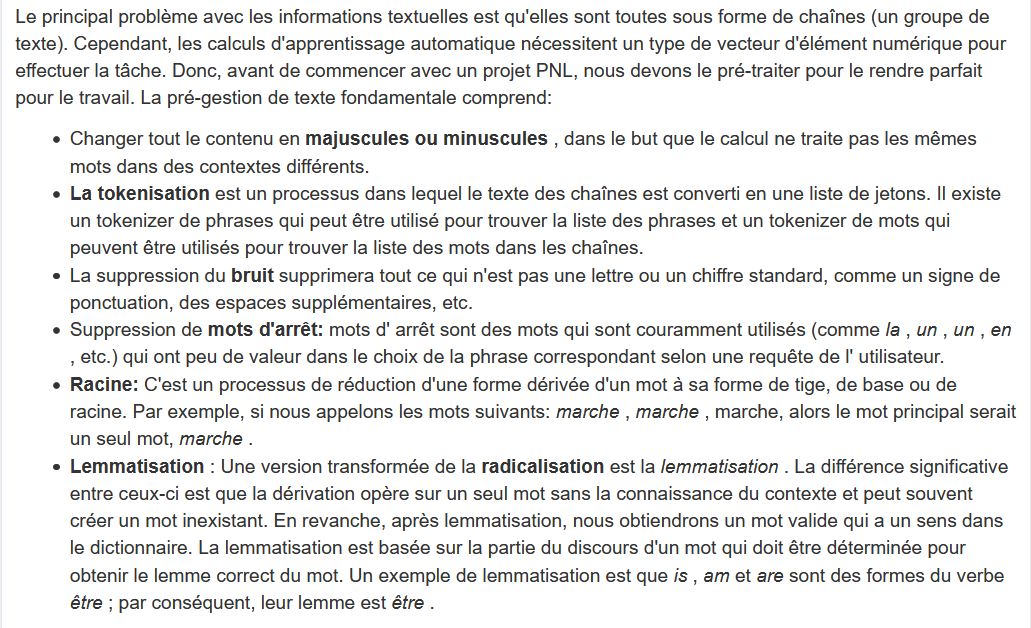

In [3]:
Image("img/pré.png")

# Importation de toutes les bibliothèques requises.

In [4]:
import nltk
import numpy as np
import random
import string # to process standard python strings
import re, string, unicodedata
import pandas as pd
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import wikipedia as wk
from collections import defaultdict
nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Corpus

En PNL, un corpus fait référence à une collection de textes. Corpus contient le texte à partir duquel les requêtes de l'utilisateur seront mises en correspondance, et le chatbot essaie de récupérer la phrase la plus fiable pour la donner en réponse à l'utilisateur. 

    Dans notre cas, le corpus sera les informations sur les ressources humaines.

En dehors de cela, nous avons également inclus la bibliothèque python de Wikipédia afin que vous puissiez tout demander.

Nous stockerons les informations dans le fichier hr.txt.

# Chargez l'ensemble de données et convertissez chaque texte en minuscules.

In [5]:
#load the dataset
data=open('C:/Users/utilisateur/Documents/Projets/Document-based-chatbot-master/hr.txt','r',errors = 'ignore')
raw=data.read()
raw = raw.lower()

# Voyons à quoi ressemblent nos données.

# Prétraitement des données

Commençons maintenant par le nettoyage et le prétraitement des données en convertissant l'ensemble des données en une liste de phrases.

In [6]:
#sentence tokenizer
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences

Notre prochaine étape consiste à normaliser ces phrases. 
La normalisation est un processus qui convertit une liste de mots en une séquence plus uniforme. 
Ceci est utile pour préparer le texte pour un traitement ultérieur. 
En transformant les mots dans un format standard, d'autres opérations sont capables de travailler avec les données et n'auront pas à traiter de problèmes qui pourraient compromettre le processus.

Cette étape implique la  création de jetons de mots, la suppression des valeurs ASCII, la suppression des balises de tout type, le marquage d'une partie du discours et la lemmatisation.

In [7]:
#Lemmatization
def Normalize(text):
    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    #word tokenization
    word_token = nltk.word_tokenize(text.lower().translate(remove_punct_dict))

    #remove ascii
    new_words = []
    for word in word_token:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)

    #Remove tags
    #Supprimer les balises 
    rmv = []
    for w in new_words:
        text=re.sub("&lt;/?.*?&gt;","&lt;&gt;",w)
        rmv.append(text)

    #pos tagging and lemmatization
    #pos marquage et lemmatisation 
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    lmtzr = WordNetLemmatizer()
    lemma_list = []
    rmv = [i for i in rmv if i]
    for token, tag in nltk.pos_tag(rmv):
        lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
        lemma_list.append(lemma)
    return lemma_list

# Correspondance des mots clés

Donc, la partie de prétraitement des données est maintenant terminée, définissons des notes de bienvenue ou des salutations, ce qui signifie que si un utilisateur fournit un message d'accueil, le chatbot doit également répondre avec un message d'accueil basé sur la correspondance de mots-clés.

Nous définirons les salutations et sa réponse afin que notre chatbot puisse le faire correspondre à partir des listes prédéfinies et saluer l'utilisateur de manière appropriée lors du démarrage et de la fin de la conversation.

In [8]:
#Greetings
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(user_response):
    for word in user_response.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

# Générer une réponse de chatbot

Pour générer une réponse de notre bot pour les requêtes d'entrée, le concept de similarité de document est utilisé. Par conséquent, nous commençons par importer les modules nécessaires.

À partir de la bibliothèque scikit learn, importez le vecteur TFidf pour convertir une collection de documents bruts en une matrice de fonctionnalités TF-IDF

    from sklearn.feature_extraction.text import TfidfVectorizer

Importez également le module de similarité cosinus de la bibliothèque scikit learn

    from sklearn.metrics.pairwise import cosine_similarity

Cela permettra de trouver la similitude entre les mots saisis par l'utilisateur et donc les mots du corpus. Cela peut être l'implémentation la plus simple possible d'un chatbot.


Pour générer une réponse de notre chatbot pour les questions d'entrée, le concept de similarité de document sera utilisé. 

Comme je l'ai déjà mentionné, le  vectoriseur TFidf  est utilisé pour convertir une collection de documents bruts en une matrice de caractéristiques TF-IDF et  pour  trouver la similitude entre les mots saisis par l'utilisateur et les mots de l'ensemble de données, nous utiliserons  la similitude cosinus .

Nous définissons une fonction  generateResponse ()  qui recherche les mots d'entrée de l'utilisateur et renvoie l'une des nombreuses réponses possibles. 
S'il ne trouve pas l'entrée correspondant à l'un des mots-clés, au lieu de donner juste un message d'erreur, vous pouvez demander à votre chatbot de rechercher Wikipedia pour vous. 
Tapez simplement  "parlez-moi de any_keyword". Désormais, s'il ne trouve rien sur Wikipédia, le chatbot générera un message  «Aucun contenu n'a été trouvé».

la similitude cosinus de 1 implique que les deux documents sont exactement identiques et une similitude cosinus de 0 indiquerait qu'il n'y a pas de similitudes entre les deux documents.

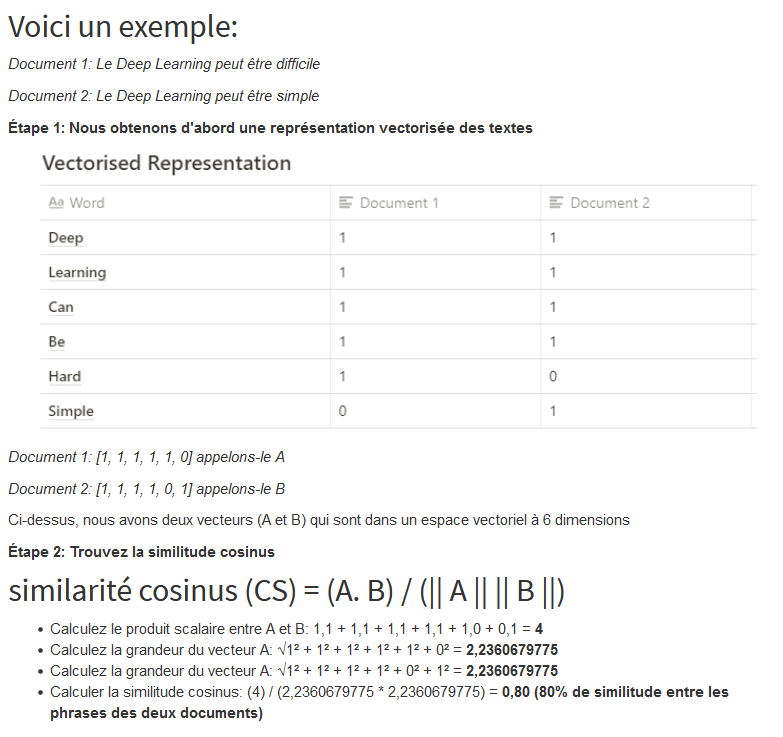

In [9]:
Image("img/Cosinus.png")

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

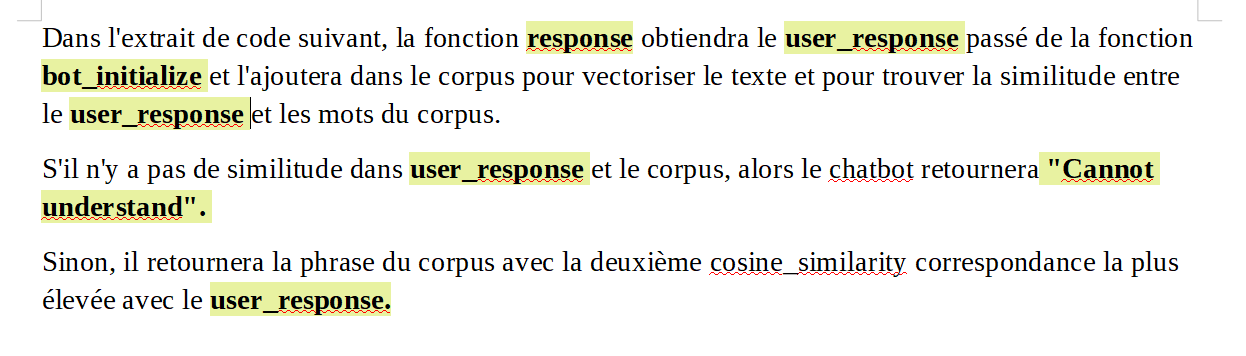

In [11]:
Image("img/rép.png")

In [12]:


def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=Normalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    #vals = cosine_similarity(tfidf[-1], tfidf)
    vals = linear_kernel(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0) or "tell me about" in user_response:
        #robo_response=robo_response+"Cannot understand"
        print("Checking Wikipedia")
        if user_response:
            robo_response = wikipedia_data(user_response)
            return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response


#wikipedia search
def wikipedia_data(input):
    reg_ex = re.search('tell me about (.*)', input)
    try:
        if reg_ex:
            topic = reg_ex.group(1)
            ny = wk.summary(topic, sentences = 3)
            return ny
    except Exception as e:
                print("No content has been found")

Enfin définir le gestionnaire de conversation utilisateur du chatbot.

Remarque: le programme se fermera si vous tapez Bye, shutdown, exit ou quit.

In [13]:
flag=True
print("My name is Chatterbot and I'm a chatbot. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("Chatterbot : You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("Chatterbot : "+greeting(user_response))
            else:
                print("Chatterbot : ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("Chatterbot : Bye! take care..")

My name is Chatterbot and I'm a chatbot. If you want to exit, type Bye!
bye
Chatterbot : Bye! take care..
